## Setup

### Installing Dependencies

In [14]:
%pip install scikit-learn
%pip install matplotlib
%pip install graphviz
%pip install numpy
%pip install pandas
%pip install scikit-learn
%pip install matplotlib
%pip install seaborn
%pip install tqdm

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\farha\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\farha\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\farha\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


### Loading Dataset

In [1]:
import pandas as pd
dataset = pd.read_csv("./dataset/merged_csv/cleaned_merged_heart_dataset.csv")
dataset.head()

X = dataset.drop('target', axis=1)
y = dataset['target']
X = X.dropna(axis=1)

###  Code for Model Training and Model Evaluation

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def fit_model(random_state_value, dataset, target):
    X_train, X_test, y_train, y_test = train_test_split(dataset, target, test_size=0.2, random_state=random_state_value)
    model = DecisionTreeClassifier(random_state=random_state_value)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    return y_test, y_pred, model, X_train, X_test

def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    return accuracy, precision, recall, f1, conf_matrix, class_report



### Multiple Runs
Done to find the best starting value for random state

In [5]:
import tqdm

results = {}

for random_state_value in tqdm.tqdm(range(19539, 19541)):
    y_test, y_pred, model, X_train, X_test = fit_model(random_state_value, X, y)
    accuracy, precision, recall, f1, conf_matrix, class_report = evaluate_model(y_test, y_pred)
    results[random_state_value] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'confusion_matrix': conf_matrix,
        'classification_report': class_report
    }
    
data = pd.DataFrame.from_dict(results, orient='index')
data = data.sort_values('accuracy', ascending=False)
data


100%|██████████| 2/2 [00:00<00:00, 54.85it/s]


,accuracy,precision,recall,f1,confusion_matrix,classification_report
19540,0.989418,0.989465,0.989418,0.989414,"[[172, 3], [1, 202]]",precision recall f1-score ...
19539,0.968254,0.968341,0.968254,0.968270,"[[165, 5], [7, 201]]",precision recall f1-score ...


## Training Model

In [6]:
# getting the best random_state
best_random_state = data.index[0]

# Train the model with the best random_state
y_test_best, y_pred_best, model, X_train, X_test  = fit_model(best_random_state, X, y)

# Evaluate the model with the best random_state
accuracy_best, precision_best, recall_best, f1_best, conf_matrix_best, class_report_best = evaluate_model(y_test_best, y_pred_best)

### Model Evaluation

#### Metrics in Text

In [11]:
def display_metrics_text(accuracy, precision, recall, f1, class_report, conf_matrix):
    specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Error Rate: {1 - accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print("\nClassification Report:")
    print(class_report)

    print("\nConfusion Matrix:")
    print(conf_matrix)

display_metrics_text(accuracy_best, precision_best, recall_best, f1_best, class_report_best, conf_matrix_best)


Accuracy: 0.9894
Error Rate: 0.0106
Precision: 0.9895
Recall: 0.9894
F1-Score: 0.9894
Specificity: 0.9829

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       175
           1       0.99      1.00      0.99       203

    accuracy                           0.99       378
   macro avg       0.99      0.99      0.99       378
weighted avg       0.99      0.99      0.99       378


Confusion Matrix:
[[172   3]
 [  1 202]]


#### Confusion Matrix, Accuracy, Precision, Recall and F-1 Score

C:\Users\sarwi\AppData\Local\Temp\ipykernel_28076\581587376.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, ax=axs[1], palette=colors)


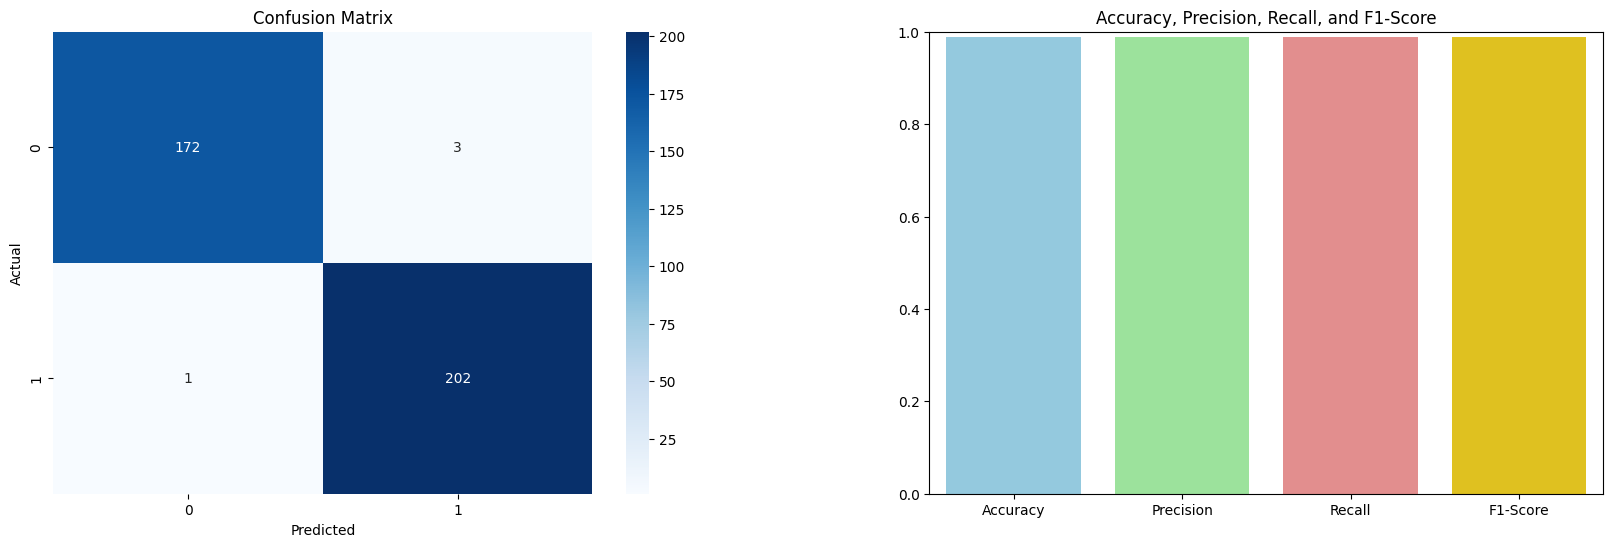

In [12]:

import matplotlib.pyplot as plt
import seaborn as sns

def display_metrics_graph(accuracy, precision, recall, f1, conf_matrix):
    fig, axs = plt.subplots(1, 2, figsize=(20, 6))

    # Plot the confusion matrix as a heatmap
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axs[0])
    axs[0].set_xlabel('Predicted')
    axs[0].set_ylabel('Actual')
    axs[0].set_title('Confusion Matrix')

    # Plot Accuracy, Precision, Recall, and F1-Score
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
    values = [accuracy, precision, recall, f1]
    colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold']  # Different colors for each bar

    sns.barplot(x=metrics, y=values, ax=axs[1], palette=colors)
    axs[1].set_ylim(0, 1)
    axs[1].set_title('Accuracy, Precision, Recall, and F1-Score')

    plt.subplots_adjust(wspace=0.3)
    plt.show()
    
display_metrics_graph(accuracy, precision, recall, f1, conf_matrix)

#### Decision Tree Visualized

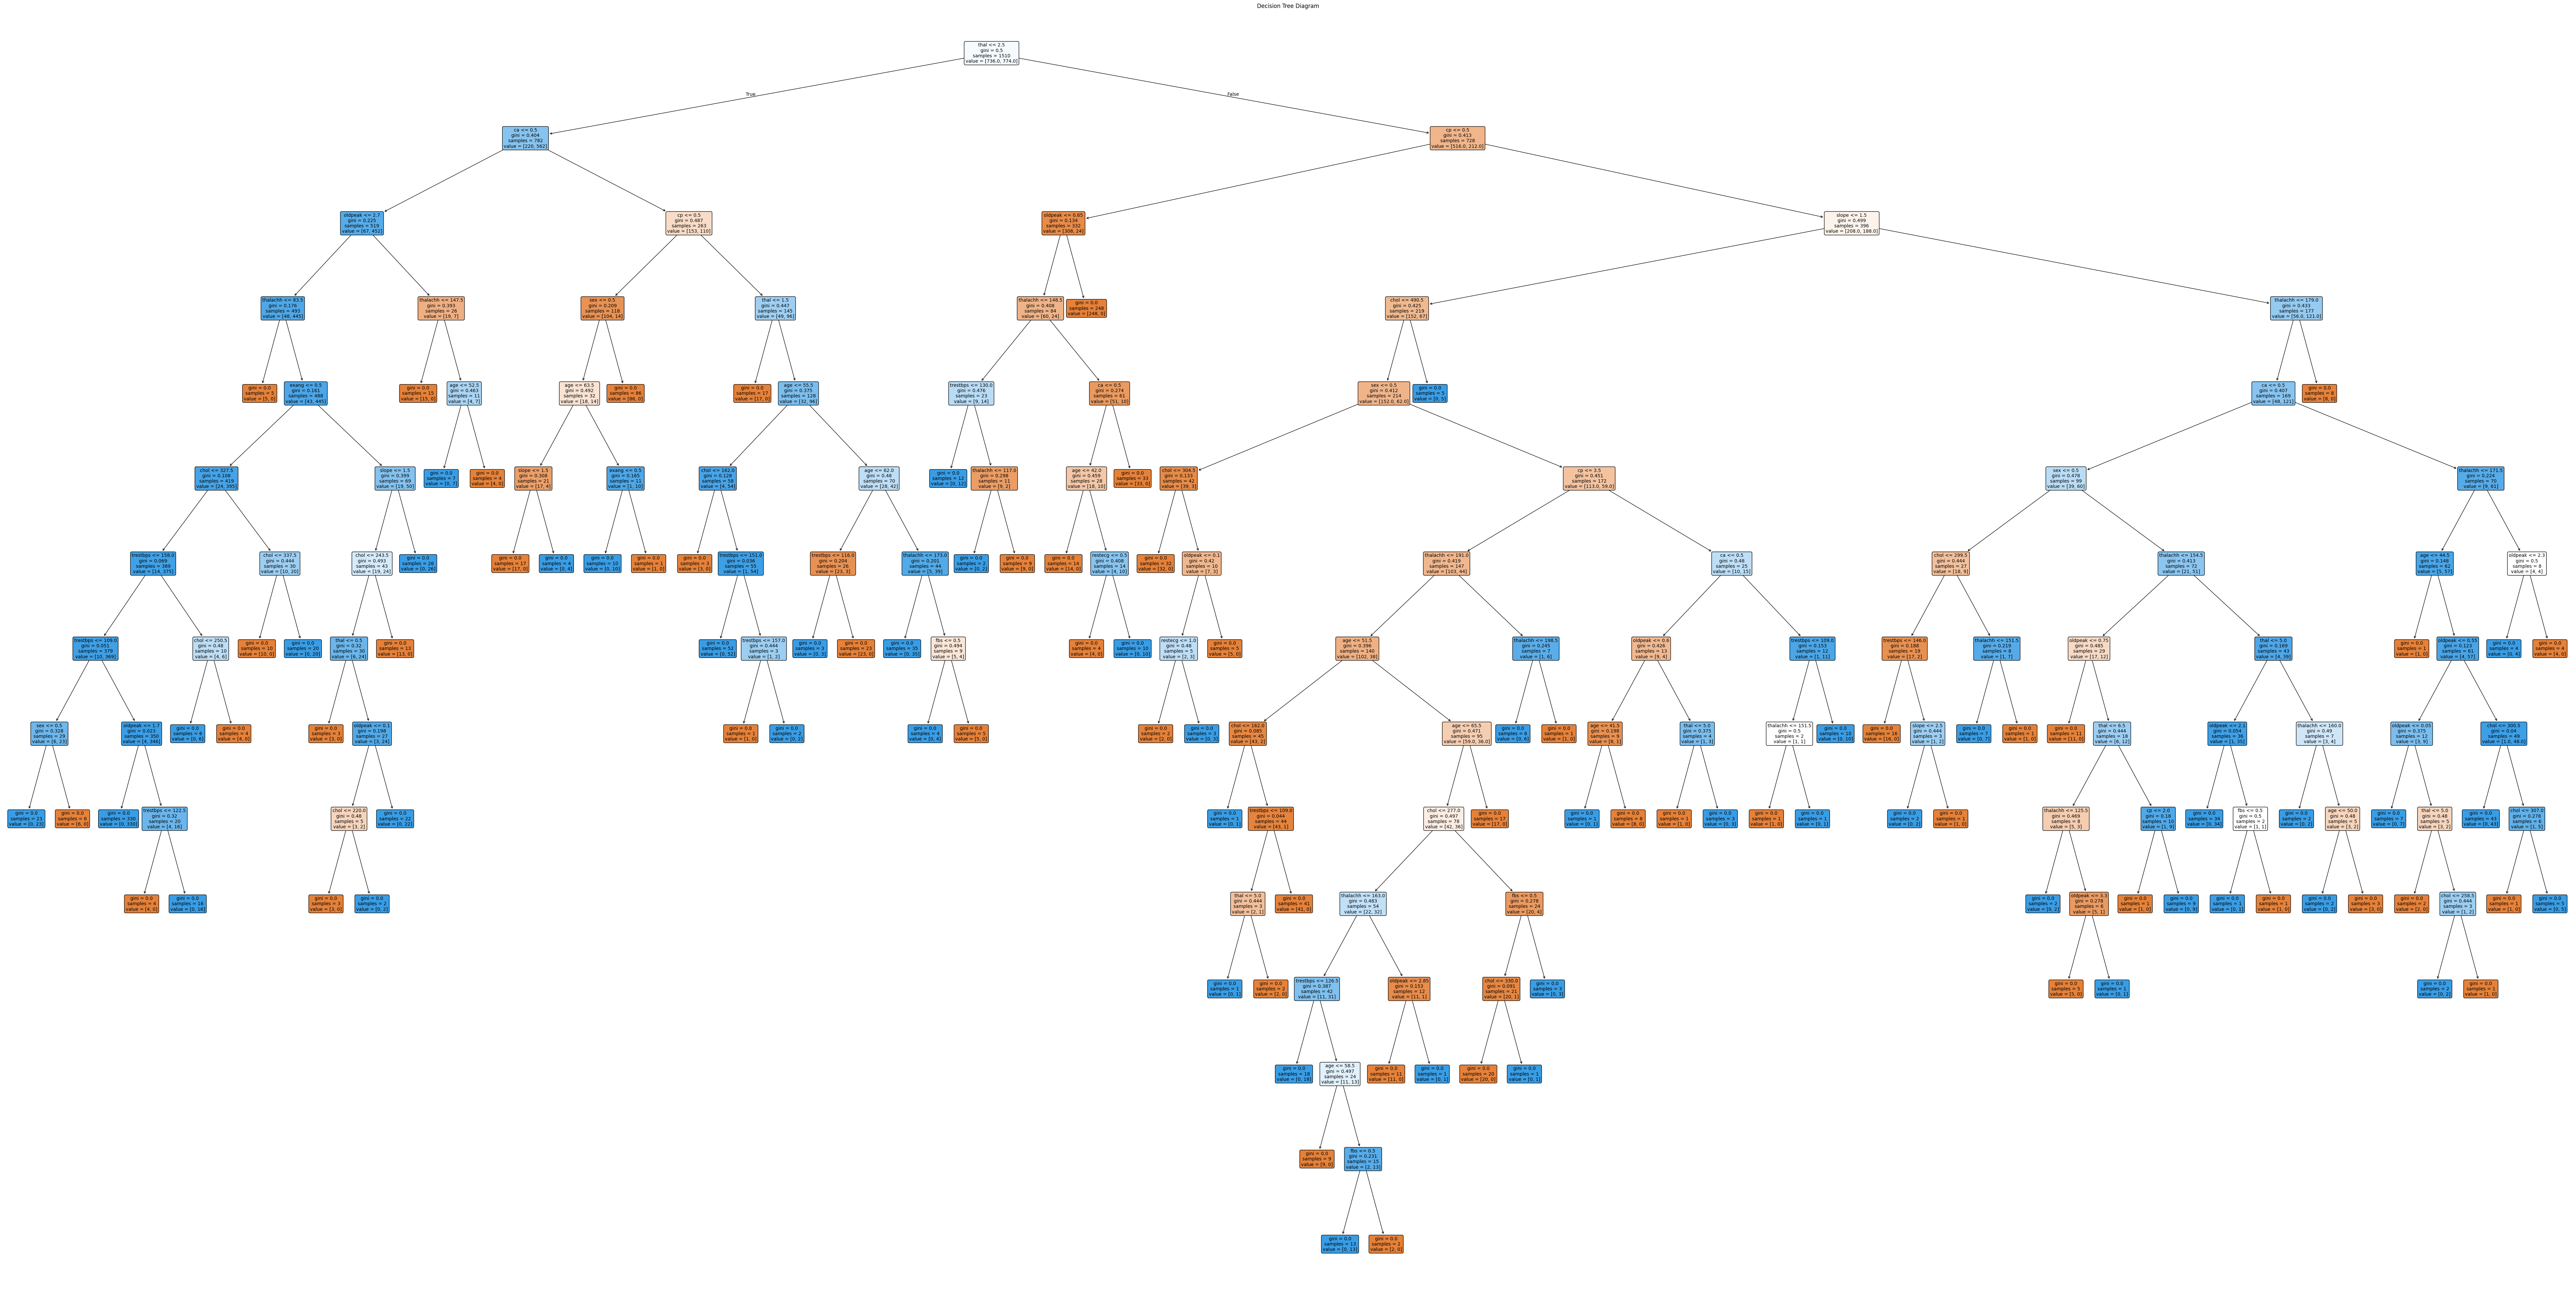

In [17]:
import os
from sklearn import tree
import matplotlib.pyplot as plt

os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

plt.figure(figsize=(100, 50))

tree.plot_tree(
    model, 
    fontsize=10, 
    feature_names=X.columns, 
    filled=True,
    rounded=True
)

plt.title('Decision Tree Diagram')
plt.show()


#### Learning Curve

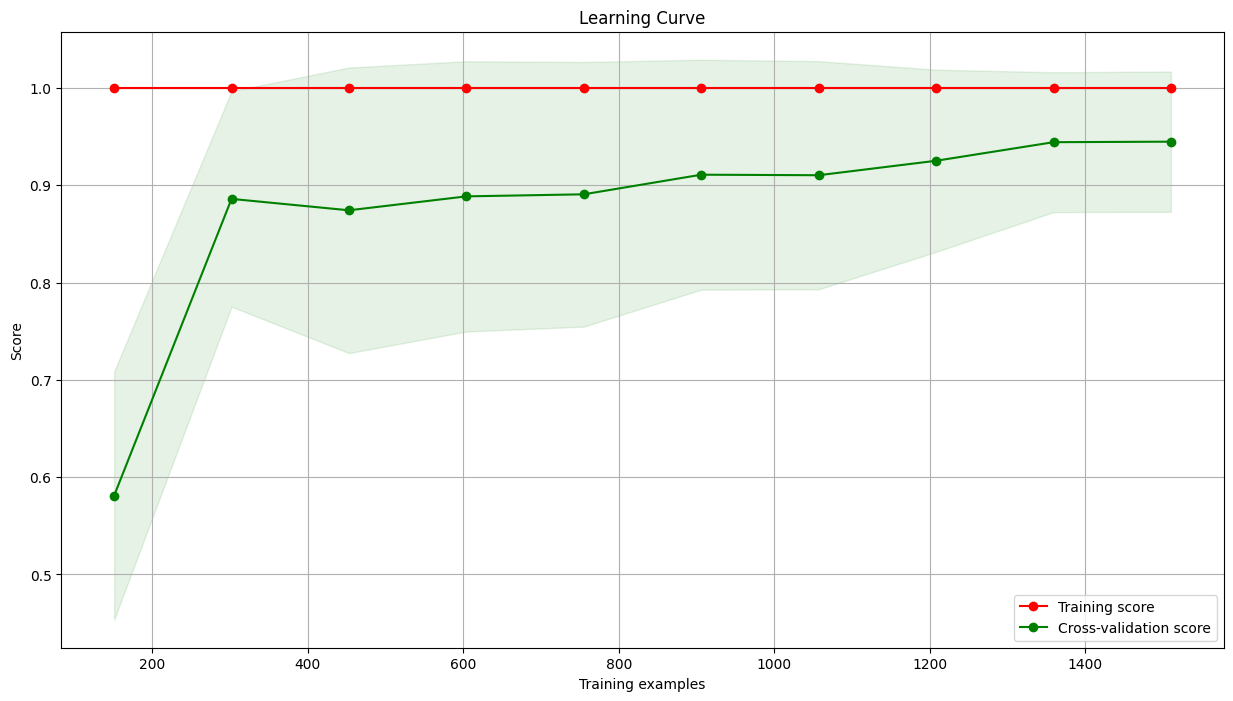

In [15]:
from sklearn.model_selection import learning_curve

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), random_state=random_state_value)

# Calculate mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(15, 8))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title('Learning Curve')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()


#### Feature Importance

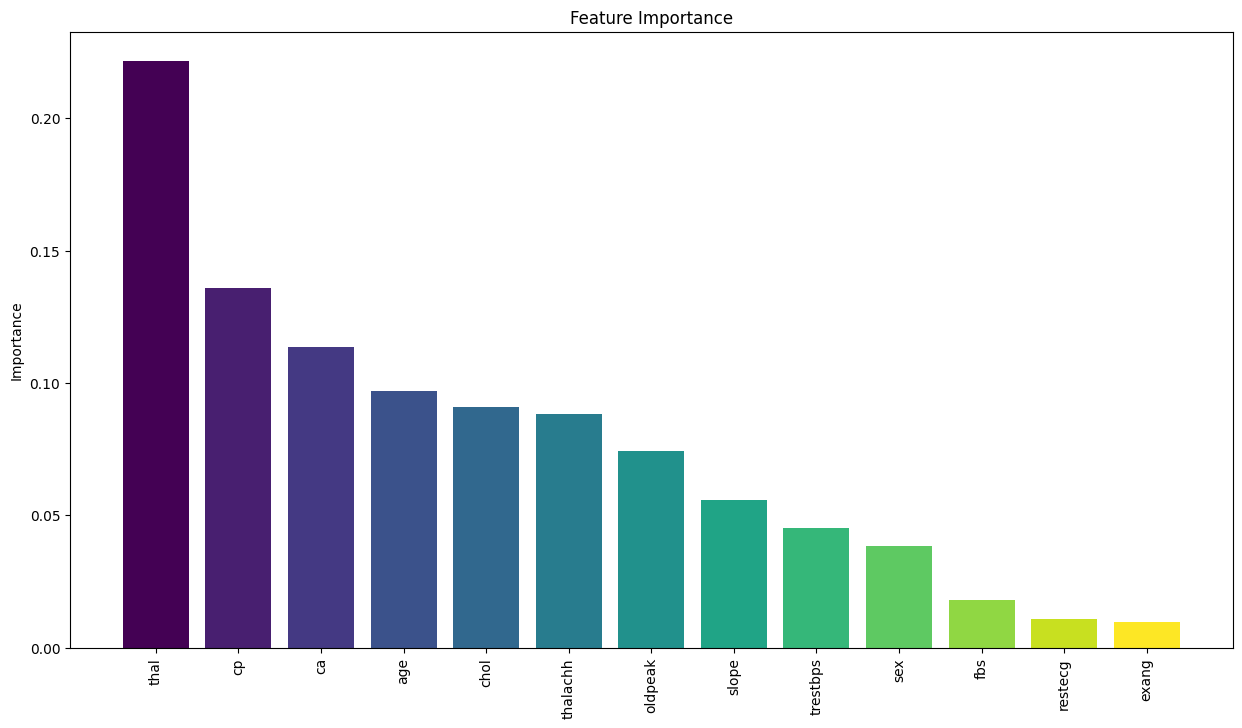

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# get feature importance and sort them
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Create a colormap
colors = plt.cm.viridis(np.linspace(0, 1, X_train.shape[1]))

# Plot the feature importances with different colors for each bar
plt.figure(figsize=(15, 8))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], color=colors, align='center')
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.ylabel('Importance')
plt.show()
